# WeissBeerger

Initial EDA

Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Read all columns (to be filtered later on):

In [2]:
table_path = "../data/df_july.csv"

df = pd.read_csv(table_path)

In [3]:
df.head()

,city,bar_id,order_id,order_time,order_item_id,title,category_id,beer_brand_id,beer_serving_type_id,beer_volume,...,country_id,state,state_id,timezone,bar_type_id,status,last_status,is_bulk,bar_type,data_availability_status_id
0,Trois-Rivières,2182,649875004,2019-07-18 09:12:44.000,64987500402,BACON,2.0,0,0,0.0,...,195,Québec,46,America/Toronto,10,12,0,0,Casual Dining,1
1,Trois-Rivières,2182,649875004,2019-07-18 09:12:44.000,64987500403,PAIN BLANC,2.0,0,0,0.0,...,195,Québec,46,America/Toronto,10,12,0,0,Casual Dining,1
2,Trois-Rivières,2182,649875004,2019-07-18 09:12:44.000,64987500400,GRASSE MATINEE,5.0,0,0,0.0,...,195,Québec,46,America/Toronto,10,12,0,0,Casual Dining,1
3,Trois-Rivières,2182,649875004,2019-07-18 09:12:44.000,64987500401,BROUILLÉ,2.0,0,0,0.0,...,195,Québec,46,America/Toronto,10,12,0,0,Casual Dining,1
4,Port Stanley,3383,649932765,2019-07-18 12:19:29.000,64993276502,Pickeral & Chips,2.0,0,0,0.0,...,195,Ontario,49,America/Toronto,1,12,0,0,Bar/Pub,1


We have total of `1754466` entries (all across Canada):

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754466 entries, 0 to 1754465
Data columns (total 26 columns):
city                           object
bar_id                         int64
order_id                       int64
order_time                     object
order_item_id                  int64
title                          object
category_id                    float64
beer_brand_id                  int64
beer_serving_type_id           int64
beer_volume                    float64
item_qty                       float64
sales_before_tax               float64
sales_inc_tax                  float64
guest_count                    int64
waiter_id                      float64
country                        object
country_id                     int64
state                          object
state_id                       int64
timezone                       object
bar_type_id                    int64
status                         int64
last_status                    int64
is_bulk           

Columns to keep:
1. city
2. bar_id
3. order_id
4. order_time
5. order_item_id
6. title
7. category_id
8. beer_brand_id
9. beer_serving_type_id
10. beer_volume
11. item_qty
12. sales_before_tax
13. sales_inc_tax
14. guest_count
15. bar_type_id
16. bar_type

Columns to drop:
1. waiter_id (irrelevant)
2. country (use `Toronto` only, so irrelevant)
3. country_id (same)
4. state (use single country)
5. state_id (use single country)
6. timezone (`America/Toronto` only)
7. status
8. last_status
9. is_bulk
10. data_availability_status_id

In [5]:
columns = ['city', 'bar_id', 'order_id', 'order_time', 'order_item_id', 'title', 'category_id',
           'beer_brand_id', 'beer_serving_type_id', 'beer_volume', 'item_qty',
           'sales_before_tax', 'sales_inc_tax', 'guest_count', 'bar_type_id', 'bar_type']

In [6]:
df = df[columns]

Alternative: drop the irrelevant columns

In [7]:
# drop = ['waiter_id', 'country', 'country_id', 'state', 'state_id', 'timezone',
#         'status', 'last_status', 'is_bulk', 'data_availability_status_id']
# df.drop(drop, axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754466 entries, 0 to 1754465
Data columns (total 16 columns):
city                    object
bar_id                  int64
order_id                int64
order_time              object
order_item_id           int64
title                   object
category_id             float64
beer_brand_id           int64
beer_serving_type_id    int64
beer_volume             float64
item_qty                float64
sales_before_tax        float64
sales_inc_tax           float64
guest_count             int64
bar_type_id             int64
bar_type                object
dtypes: float64(5), int64(7), object(4)
memory usage: 214.2+ MB


In [9]:
df.head()

,city,bar_id,order_id,order_time,order_item_id,title,category_id,beer_brand_id,beer_serving_type_id,beer_volume,item_qty,sales_before_tax,sales_inc_tax,guest_count,bar_type_id,bar_type
0,Trois-Rivières,2182,649875004,2019-07-18 09:12:44.000,64987500402,BACON,2.0,0,0,0.0,1.0,0.00,0.000000,1,10,Casual Dining
1,Trois-Rivières,2182,649875004,2019-07-18 09:12:44.000,64987500403,PAIN BLANC,2.0,0,0,0.0,1.0,0.00,0.000000,1,10,Casual Dining
2,Trois-Rivières,2182,649875004,2019-07-18 09:12:44.000,64987500400,GRASSE MATINEE,5.0,0,0,0.0,1.0,6.50,7.480000,1,10,Casual Dining
3,Trois-Rivières,2182,649875004,2019-07-18 09:12:44.000,64987500401,BROUILLÉ,2.0,0,0,0.0,1.0,0.00,0.000000,1,10,Casual Dining
4,Port Stanley,3383,649932765,2019-07-18 12:19:29.000,64993276502,Pickeral & Chips,2.0,0,0,0.0,1.0,17.99,20.330203,2,1,Bar/Pub


Fix the `order_time` column (use `ISODate`):

In [10]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%Y-%m-%d %H:%M:%S.%f')

In [11]:
df.head()

,city,bar_id,order_id,order_time,order_item_id,title,category_id,beer_brand_id,beer_serving_type_id,beer_volume,item_qty,sales_before_tax,sales_inc_tax,guest_count,bar_type_id,bar_type
0,Trois-Rivières,2182,649875004,2019-07-18 09:12:44,64987500402,BACON,2.0,0,0,0.0,1.0,0.00,0.000000,1,10,Casual Dining
1,Trois-Rivières,2182,649875004,2019-07-18 09:12:44,64987500403,PAIN BLANC,2.0,0,0,0.0,1.0,0.00,0.000000,1,10,Casual Dining
2,Trois-Rivières,2182,649875004,2019-07-18 09:12:44,64987500400,GRASSE MATINEE,5.0,0,0,0.0,1.0,6.50,7.480000,1,10,Casual Dining
3,Trois-Rivières,2182,649875004,2019-07-18 09:12:44,64987500401,BROUILLÉ,2.0,0,0,0.0,1.0,0.00,0.000000,1,10,Casual Dining
4,Port Stanley,3383,649932765,2019-07-18 12:19:29,64993276502,Pickeral & Chips,2.0,0,0,0.0,1.0,17.99,20.330203,2,1,Bar/Pub


----------------------
Alternative: read the specified columns only:

In [12]:
# df = pd.read_csv(table_path, usecols=columns)

------------------------------

## EDA

### Questions & Analysis

1. How many orders per ticket
2. How many item orders for category per ticket
3. How many tickets per hour (use binning)
4. How many tickets per day of week
5. How many orders per category
6. Discription of `sales_inc_tax` per ticket
7. Distribution of `bar_type`
8. Distribution of `guest_count`
9. Distribution of `item_qty`
10. 


#### Focus on beers
1. Distribution of `beer_brand_id`
2. Distribution of `beer_serving_type_id`
3. Discription of `beer_volume`
4. 

In [13]:
df.city.value_counts()

Toronto             320888
Ottawa              172689
Vancouver           117234
Montreal            103009
London               69177
Mississauga          62267
Winnipeg             51495
Québec               48342
Victoria             48091
Gatineau             36378
Brampton             32438
Burlington           28855
Huntsville           25661
Kingston             24996
Halifax              23692
Laval                21220
Whitby               20555
Mont-Tremblant       20152
Barrie               19905
Pickering            19734
Trois-Rivières       19147
Abbotsford           18481
Saskatoon            17009
Granby               16147
Goderich             15936
Newmarket            15198
Markham              14675
Longueuil            14483
Kitchener            14392
Richmond Hill        14369
                     ...  
Surrey                6793
Kelowna               5908
Prince George         5737
Sherbrooke            5545
Port Stanley          5370
Cambridge             5212
C

Focus on Toronto (`320888` entries):

In [14]:
df = df[df['city'] == 'Toronto']
df.head()

,city,bar_id,order_id,order_time,order_item_id,title,category_id,beer_brand_id,beer_serving_type_id,beer_volume,item_qty,sales_before_tax,sales_inc_tax,guest_count,bar_type_id,bar_type
17,Toronto,17125,650218782,2019-07-18 19:12:00,65021878201,LG BUD LIGHT,1.0,15,2,0.591,1.0,6.25,7.0625,5,1,Bar/Pub
18,Toronto,17125,650218782,2019-07-18 19:12:00,65021878200,LG BUD LIGHT,1.0,15,2,0.591,1.0,6.25,7.0625,5,1,Bar/Pub
19,Toronto,17125,650218782,2019-07-18 19:12:00,65021878204,MASI VALPOLI GLS,6.0,0,0,0.000,1.0,11.50,12.9950,5,1,Bar/Pub
20,Toronto,17125,650218782,2019-07-18 19:12:00,65021878203,MASI VALPOLI GLS,6.0,0,0,0.000,1.0,11.50,12.9950,5,1,Bar/Pub
21,Toronto,17125,650218782,2019-07-18 19:12:00,65021878202,MASI VALPOLI GLS,6.0,0,0,0.000,1.0,11.50,12.9950,5,1,Bar/Pub


##### total_orders

In [15]:
df['total_orders'] = df.groupby('order_id')['order_id'].transform('size')

In [16]:
order_id = 650218782

In [17]:
df[df['order_id'] == order_id][['order_id', 'order_item_id', 'total_orders']]

,order_id,order_item_id,total_orders
17,650218782,65021878201,5
18,650218782,65021878200,5
19,650218782,65021878204,5
20,650218782,65021878203,5
21,650218782,65021878202,5


In [18]:
df.category_id.value_counts()

2.0    152031
1.0     59797
3.0     46964
4.0     40016
5.0     10527
6.0      9894
Name: category_id, dtype: int64

In [19]:
df = pd.concat([df, pd.get_dummies(df['category_id'], prefix='category_id')], axis=1)

In [20]:
categories_ids = ['category_id_' + str(float(i)) for i in range(1, 7)]

df[df['order_id'] == order_id][['order_id', 'order_item_id', 'category_id'] + categories_ids]

,order_id,order_item_id,category_id,category_id_1.0,category_id_2.0,category_id_3.0,category_id_4.0,category_id_5.0,category_id_6.0
17,650218782,65021878201,1.0,1,0,0,0,0,0
18,650218782,65021878200,1.0,1,0,0,0,0,0
19,650218782,65021878204,6.0,0,0,0,0,0,1
20,650218782,65021878203,6.0,0,0,0,0,0,1
21,650218782,65021878202,6.0,0,0,0,0,0,1


##### total_orders_category_id_X

In [21]:
category_ids = [float(i) for i in range(1, 7)]

for category_id in category_ids:
    df['total_orders_category_id_' + str(category_id)] =\
        df.groupby('order_id')['category_id_' + str(category_id)].transform('sum')

In [22]:
total_categories_ids = ['total_orders_category_id_' + str(float(i)) for i in range(1, 7)]

df[df['order_id'] == order_id][['order_id', 'order_item_id', 'category_id'] + categories_ids + total_categories_ids]

,order_id,order_item_id,category_id,category_id_1.0,category_id_2.0,category_id_3.0,category_id_4.0,category_id_5.0,category_id_6.0,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0
17,650218782,65021878201,1.0,1,0,0,0,0,0,2,0,0,0,0,3
18,650218782,65021878200,1.0,1,0,0,0,0,0,2,0,0,0,0,3
19,650218782,65021878204,6.0,0,0,0,0,0,1,2,0,0,0,0,3
20,650218782,65021878203,6.0,0,0,0,0,0,1,2,0,0,0,0,3
21,650218782,65021878202,6.0,0,0,0,0,0,1,2,0,0,0,0,3


In [23]:
one_hot_encoded = ['category_id_' + str(category_id) for category_id in category_ids]
df.drop(one_hot_encoded, axis=1, inplace=True)

In [24]:
df[df['order_id'] == order_id][['order_id', 'order_item_id', 'category_id'] + total_categories_ids]

,order_id,order_item_id,category_id,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0
17,650218782,65021878201,1.0,2,0,0,0,0,3
18,650218782,65021878200,1.0,2,0,0,0,0,3
19,650218782,65021878204,6.0,2,0,0,0,0,3
20,650218782,65021878203,6.0,2,0,0,0,0,3
21,650218782,65021878202,6.0,2,0,0,0,0,3


### orders_table

Keep 1 entry per table, use the following features:
- order_id
- order_time (of the first item only)
- guest_count
- bar_type
- total_orders
- total_orders_category_id_X (X = 1.0 ... 6.0)

In [25]:
total_categories_ids = ['total_orders_category_id_' + str(float(i)) for i in range(1, 7)]
ticket_columns = ['order_time', 'guest_count', 'bar_type', 'total_orders'] + total_categories_ids

df_tickets = df.groupby('order_id').first()[ticket_columns]

In [26]:
df_tickets.head()

,order_time,guest_count,bar_type,total_orders,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0
order_id,,,,,,,,,,
646982997,2019-07-14 09:13:33,3,Bar/Pub,6,0,3,0,3,0,0
646990013,2019-07-14 09:45:42,0,Restaurante informal,1,0,1,0,0,0,0
646991407,2019-07-14 09:02:10,2,Restaurant,2,0,2,0,0,0,0
646991486,2019-07-14 09:16:05,3,Bar/Pub,4,0,3,0,1,0,0
646991546,2019-07-14 09:10:00,0,NaN,2,0,2,0,0,0,0


##### order_hour

Make sure to count each ticket as a single entry: use `df_tickets` table rather than `df`

In [27]:
df['order_hour'] = df.order_time.apply(lambda ticket: ticket.hour)

In [28]:
df_tickets['order_hour'] = df_tickets.order_time.apply(lambda ticket: ticket.hour)

In [29]:
df_tickets.loc[[order_id], ['order_time', 'order_hour']]

,order_time,order_hour
order_id,,
650218782,2019-07-18 19:12:00,19


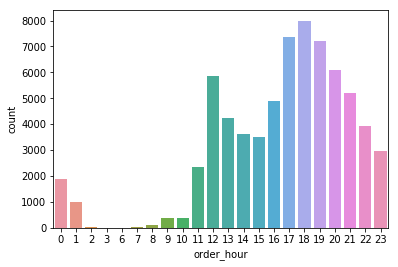

In [30]:
sns.countplot(x='order_hour', data=df_tickets)

##### order_day_of_week

Make sure to count each ticket as a single entry: use `df_tickets` table rather than `df`

In [31]:
df['order_day_of_week'] = df.order_time.apply(lambda ticket: ticket.day_name())

In [32]:
df_tickets['order_day_of_week'] = df_tickets.order_time.apply(lambda ticket: ticket.day_name())

In [33]:
df_tickets.loc[[order_id], ['order_time', 'order_day_of_week']]

,order_time,order_day_of_week
order_id,,
650218782,2019-07-18 19:12:00,Thursday


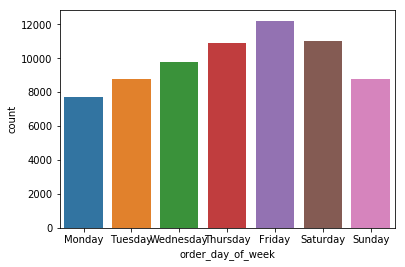

In [34]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(x='order_day_of_week', data=df_tickets, order=days_of_week)

##### category_id

1. beer
2. food
3. liquer and alcohol
4. soft drinks
5. side dishes
6. cocktails and wine

In [35]:
df.category_id.value_counts(normalize=True)

2.0    0.476244
1.0    0.187317
3.0    0.147117
4.0    0.125352
5.0    0.032976
6.0    0.030993
Name: category_id, dtype: float64

##### sales_before_tax_total & sales_inc_tax_total



Make sure to count each ticket as a single entry: use `df_tickets` table rather than `df`

In [36]:
df['sales_before_tax_total'] = df.groupby('order_id')['sales_before_tax'].transform('sum')
df['sales_inc_tax_total'] = df.groupby('order_id')['sales_inc_tax'].transform('sum')

In [37]:
columns = ['order_id', 'order_item_id', 'sales_before_tax', 'sales_before_tax_total', 'sales_inc_tax', 'sales_inc_tax_total']

df[df['order_id'] == order_id][columns]

,order_id,order_item_id,sales_before_tax,sales_before_tax_total,sales_inc_tax,sales_inc_tax_total
17,650218782,65021878201,6.25,47.0,7.0625,53.11
18,650218782,65021878200,6.25,47.0,7.0625,53.11
19,650218782,65021878204,11.50,47.0,12.9950,53.11
20,650218782,65021878203,11.50,47.0,12.9950,53.11
21,650218782,65021878202,11.50,47.0,12.9950,53.11


In [38]:
total_categories_ids = ['total_orders_category_id_' + str(float(i)) for i in range(1, 7)]
ticket_columns = ['order_time', 'guest_count', 'bar_type', 'total_orders', 'sales_before_tax_total', 'sales_inc_tax_total']\
                    + total_categories_ids

df_tickets = df.groupby('order_id').first()[ticket_columns]

In [39]:
df_tickets.head()

,order_time,guest_count,bar_type,total_orders,sales_before_tax_total,sales_inc_tax_total,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0
order_id,,,,,,,,,,,,
646982997,2019-07-14 09:13:33,3,Bar/Pub,6,43.34,48.97,0,3,0,3,0,0
646990013,2019-07-14 09:45:42,0,Restaurante informal,1,2.49,2.81,0,1,0,0,0,0
646991407,2019-07-14 09:02:10,2,Restaurant,2,14.98,16.93,0,2,0,0,0,0
646991486,2019-07-14 09:16:05,3,Bar/Pub,4,33.66,38.04,0,3,0,1,0,0
646991546,2019-07-14 09:10:00,0,NaN,2,28.00,31.64,0,2,0,0,0,0


C:\Users\Ronni\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


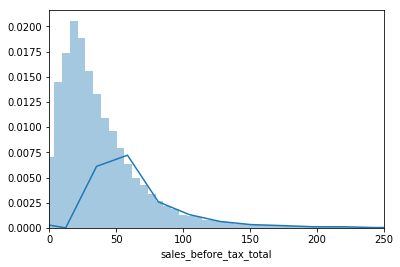

In [40]:
fig, ax = plt.subplots()
sns.distplot(df_tickets['sales_before_tax_total'], bins=500, ax=ax)
ax.set_xlim(0, 250);

----------------------

#### Looking for tickets with varying order times

Try to find tables with varying (not fixed) `order_time` for the different items.  
(if found, it'd be helpful for `guest_count` feature evaluation)

In [42]:
df['ticket_min_order_time'] = df.groupby('order_id')['order_time'].transform(np.min)
df['ticket_max_order_time'] = df.groupby('order_id')['order_time'].transform(np.max)

Create a boolean feature for each entry - whether it equals the minimum order time in the ticket (`True`) or not (`False`)

In [44]:
df.head()

,city,bar_id,order_id,order_time,order_item_id,title,category_id,beer_brand_id,beer_serving_type_id,beer_volume,...,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,order_hour,order_day_of_week,sales_before_tax_total,sales_inc_tax_total,ticket_min_order_time,ticket_max_order_time
17,Toronto,17125,650218782,2019-07-18 19:12:00,65021878201,LG BUD LIGHT,1.0,15,2,0.591,...,0,0,0,3,19,Thursday,47.0,53.11,2019-07-18 19:12:00,2019-07-18 19:12:00
18,Toronto,17125,650218782,2019-07-18 19:12:00,65021878200,LG BUD LIGHT,1.0,15,2,0.591,...,0,0,0,3,19,Thursday,47.0,53.11,2019-07-18 19:12:00,2019-07-18 19:12:00
19,Toronto,17125,650218782,2019-07-18 19:12:00,65021878204,MASI VALPOLI GLS,6.0,0,0,0.000,...,0,0,0,3,19,Thursday,47.0,53.11,2019-07-18 19:12:00,2019-07-18 19:12:00
20,Toronto,17125,650218782,2019-07-18 19:12:00,65021878203,MASI VALPOLI GLS,6.0,0,0,0.000,...,0,0,0,3,19,Thursday,47.0,53.11,2019-07-18 19:12:00,2019-07-18 19:12:00
21,Toronto,17125,650218782,2019-07-18 19:12:00,65021878202,MASI VALPOLI GLS,6.0,0,0,0.000,...,0,0,0,3,19,Thursday,47.0,53.11,2019-07-18 19:12:00,2019-07-18 19:12:00


In [51]:
df['is_first_order_in_ticket'] = df.apply(lambda order: order['order_time'] == order['ticket_min_order_time'], axis=1)

In [52]:
df.head()

,city,bar_id,order_id,order_time,order_item_id,title,category_id,beer_brand_id,beer_serving_type_id,beer_volume,...,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,order_hour,order_day_of_week,sales_before_tax_total,sales_inc_tax_total,ticket_min_order_time,ticket_max_order_time,is_first_order_in_ticket
17,Toronto,17125,650218782,2019-07-18 19:12:00,65021878201,LG BUD LIGHT,1.0,15,2,0.591,...,0,0,3,19,Thursday,47.0,53.11,2019-07-18 19:12:00,2019-07-18 19:12:00,True
18,Toronto,17125,650218782,2019-07-18 19:12:00,65021878200,LG BUD LIGHT,1.0,15,2,0.591,...,0,0,3,19,Thursday,47.0,53.11,2019-07-18 19:12:00,2019-07-18 19:12:00,True
19,Toronto,17125,650218782,2019-07-18 19:12:00,65021878204,MASI VALPOLI GLS,6.0,0,0,0.000,...,0,0,3,19,Thursday,47.0,53.11,2019-07-18 19:12:00,2019-07-18 19:12:00,True
20,Toronto,17125,650218782,2019-07-18 19:12:00,65021878203,MASI VALPOLI GLS,6.0,0,0,0.000,...,0,0,3,19,Thursday,47.0,53.11,2019-07-18 19:12:00,2019-07-18 19:12:00,True
21,Toronto,17125,650218782,2019-07-18 19:12:00,65021878202,MASI VALPOLI GLS,6.0,0,0,0.000,...,0,0,3,19,Thursday,47.0,53.11,2019-07-18 19:12:00,2019-07-18 19:12:00,True


Look for entries when `is_first_order_in_ticket` == `False`, this will return all orders that were not ordered all at once!

In [53]:
df.is_first_order_in_ticket.value_counts()

True    320888
Name: is_first_order_in_ticket, dtype: int64

**None**!